[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1THkwr7fvaxNx2cGL9DgrxWm6rGDd8Buo)

# Problem 2

In [ ]:
import requests

_id_dict = {
    'bv_data.csv': '18xzCIj-zKjcq6mX3BcbfgbyxvsPIZ0oq',
}

def download_from_gdrive(file_path):
    file_id = _id_dict[file_path]

    URL = "https://docs.google.com/uc?export=download&confirm=1"

    session = requests.Session()

    response = session.get(URL, params={"id": file_id}, stream=True)
    token = get_confirm_token(response)

    if token:
        params = {"id": file_id, "confirm": token}
        response = session.get(URL, params=params, stream=True)
    save_content(response, file_path)


def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith("download_warning"):
            return value
    return None


def save_content(response, destination):
    with open(destination, "wb") as f:
        for chunk in response.iter_content(1024* 1024 * 100):
            if chunk:
                f.write(chunk)

In [ ]:
# Setup:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")

## Example code using the polyfit and kfold functions

#### Note: This section is not part of the homework problem, but provides some potentially-helpful example code regarding the usage of numpy.polyfit, numpy.polyval, and sklearn.model_selection.KFold.

First, let's generate some synthetic data: a quadratic function plus some Gaussian noise.

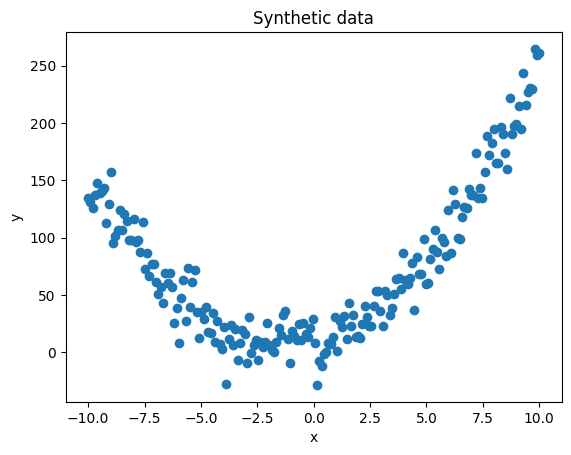

In [ ]:
# Coefficients of the quadratic function, y(x) = ax^2 + bx + c:
a = 2
b = 5
c = 7

N = 200       # Number of data points
x = np.linspace(-10, 10, num = N)                # x ranges from -10 to 10
# y is the quadratic function of x specified by a, b, and c, plus noise
y = a*x**2 + b*x + c + 15* np.random.randn(N)

# Plot the data:
plt.figure()
plt.plot(x, y, marker = 'o', linewidth = 0)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic data')

plt.show()

Next, we'll use the numpy.polyfit function to fit a quadratic polynomial to this data. We can evaluate the resulting polynomial at arbitrary points.

We fit the following quadratic function: f(x) = 1.932468*x^2 + 4.875166*x + 8.507590

f(4) = 58.927747


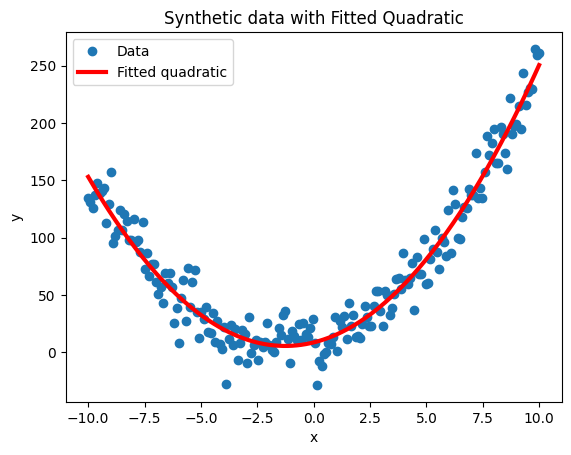

In [ ]:
# Fit a degree-2 polynomial to the data:
degree = 2
coefficients = np.polyfit(x, y, degree)

# Print out the resulting quadratic function:
print('We fit the following quadratic function: f(x) = %f*x^2 + %f*x + %f' %  \
      (coefficients[0], coefficients[1], coefficients[2]))

# Evaluate the fitted polynomial at x = 4:
x_test = 4
f_eval = np.polyval(coefficients, x_test)
print('\nf(%i) = %f' % (x_test, f_eval))

# Let's visualize our fitted quadratic:
plt.figure()

plt.plot(x, y, marker = 'o', linewidth = 0)
plt.plot(x, np.polyval(coefficients, x), color = 'red', linewidth = 3)

plt.legend(['Data', 'Fitted quadratic'], loc = 'best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic data with Fitted Quadratic')

plt.show()

Finally, assume that we'd like to perform 10-fold cross validation with this dataset. Let's divide it into training and test sets, and print out the test sets. To limit the amount of text that we are printing out, we'll modify the dataset to make it smaller.

In [ ]:
# Coefficients of the quadratic function, y = ax^2 + bx + c:
a = 2
b = 5
c = 7

N = 80       # Number of points--fewer this time!
x = np.linspace(-10, 10, num = N)                # x ranges from -10 to 10
# y is the quadratic function of x specified by a, b, and c, plus noise
y = a*x**2 + b*x + c + 15* np.random.randn(N)

# Initialize kfold cross-validation object with 10 folds:
num_folds = 10
kf = KFold(n_splits=num_folds)

# Iterate through cross-validation folds:
i = 1
for train_index, test_index in kf.split(x):

    # Print out test indices:
    print('Fold ', i, ' of ', num_folds, ' test indices:', test_index)

    # Training and testing data points for this fold:
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    i += 1

Fold  1  of  10  test indices: [0 1 2 3 4 5 6 7]
Fold  2  of  10  test indices: [ 8  9 10 11 12 13 14 15]
Fold  3  of  10  test indices: [16 17 18 19 20 21 22 23]
Fold  4  of  10  test indices: [24 25 26 27 28 29 30 31]
Fold  5  of  10  test indices: [32 33 34 35 36 37 38 39]
Fold  6  of  10  test indices: [40 41 42 43 44 45 46 47]
Fold  7  of  10  test indices: [48 49 50 51 52 53 54 55]
Fold  8  of  10  test indices: [56 57 58 59 60 61 62 63]
Fold  9  of  10  test indices: [64 65 66 67 68 69 70 71]
Fold  10  of  10  test indices: [72 73 74 75 76 77 78 79]


## Loading the Data for Problem 2

This code loads the data from bv_data.csv using the load_data helper function. Note that data[:, 0] is an array of all the x values in the data and data[:, 1] is an array of the corresponding y values.

In [ ]:
download_from_gdrive('bv_data.csv')

In [ ]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    Input:
        filename: given as a string.
    Output:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

In [ ]:
data = load_data('bv_data.csv')
x = data[:, 0]
y = data[:, 1]

Write your code below for solving problem 2 part B:

Fold  1  of  5  test indices: [0 1 2 3]
Fold  2  of  5  test indices: [4 5 6 7]
Fold  3  of  5  test indices: [ 8  9 10 11]
Fold  4  of  5  test indices: [12 13 14 15]
Fold  5  of  5  test indices: [16 17 18 19]


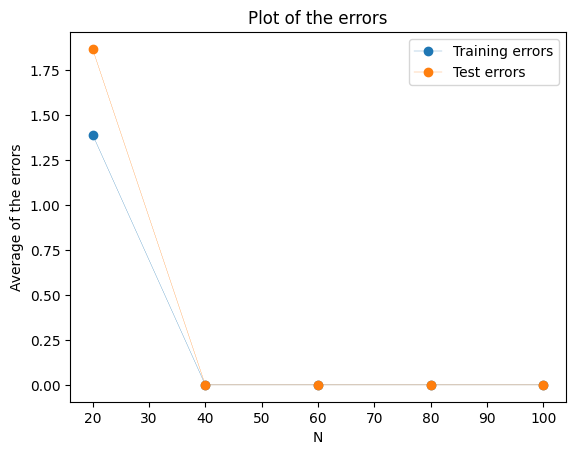

Fold  1  of  5  test indices: [0 1 2 3]
Fold  2  of  5  test indices: [4 5 6 7]
Fold  3  of  5  test indices: [ 8  9 10 11]
Fold  4  of  5  test indices: [12 13 14 15]
Fold  5  of  5  test indices: [16 17 18 19]


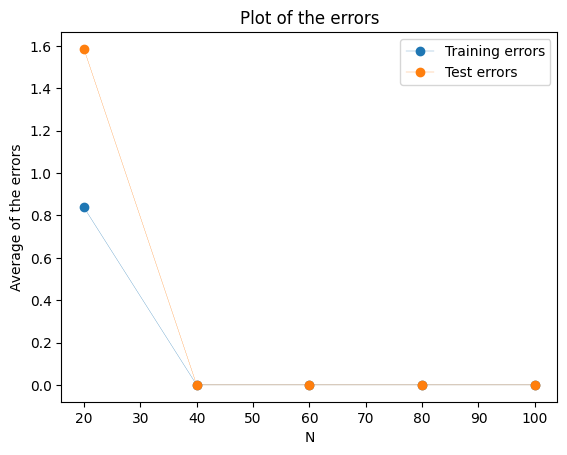

Fold  1  of  5  test indices: [0 1 2 3]
Fold  2  of  5  test indices: [4 5 6 7]
Fold  3  of  5  test indices: [ 8  9 10 11]
Fold  4  of  5  test indices: [12 13 14 15]
Fold  5  of  5  test indices: [16 17 18 19]


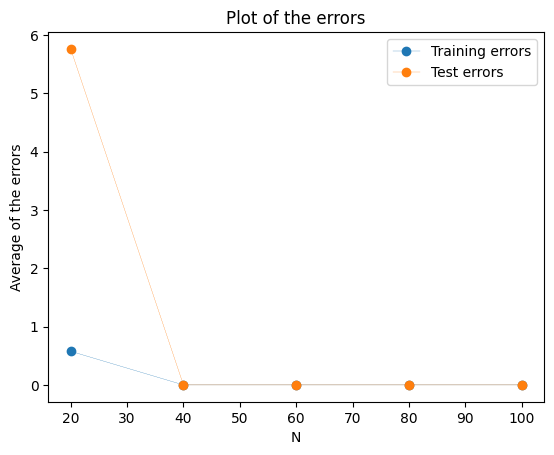

Fold  1  of  5  test indices: [0 1 2 3]
Fold  2  of  5  test indices: [4 5 6 7]
Fold  3  of  5  test indices: [ 8  9 10 11]
Fold  4  of  5  test indices: [12 13 14 15]
Fold  5  of  5  test indices: [16 17 18 19]


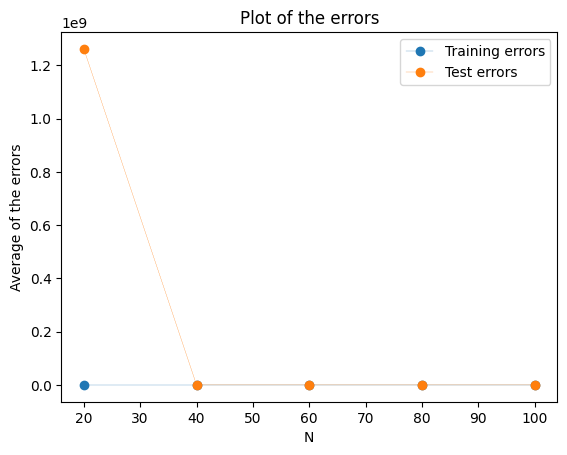

Fold  1  of  5  test indices: [0 1 2 3 4 5 6 7]
Fold  2  of  5  test indices: [ 8  9 10 11 12 13 14 15]
Fold  3  of  5  test indices: [16 17 18 19 20 21 22 23]
Fold  4  of  5  test indices: [24 25 26 27 28 29 30 31]
Fold  5  of  5  test indices: [32 33 34 35 36 37 38 39]


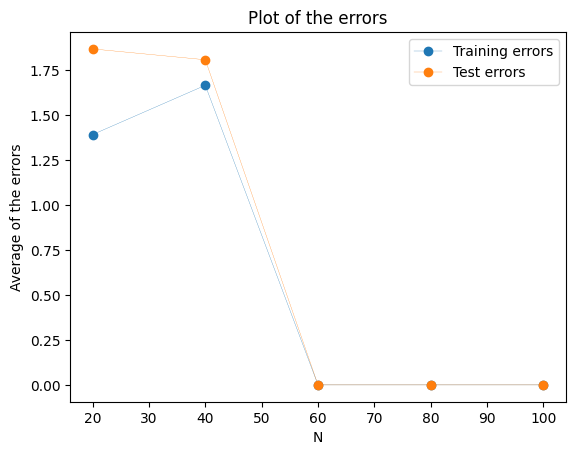

Fold  1  of  5  test indices: [0 1 2 3 4 5 6 7]
Fold  2  of  5  test indices: [ 8  9 10 11 12 13 14 15]
Fold  3  of  5  test indices: [16 17 18 19 20 21 22 23]
Fold  4  of  5  test indices: [24 25 26 27 28 29 30 31]
Fold  5  of  5  test indices: [32 33 34 35 36 37 38 39]


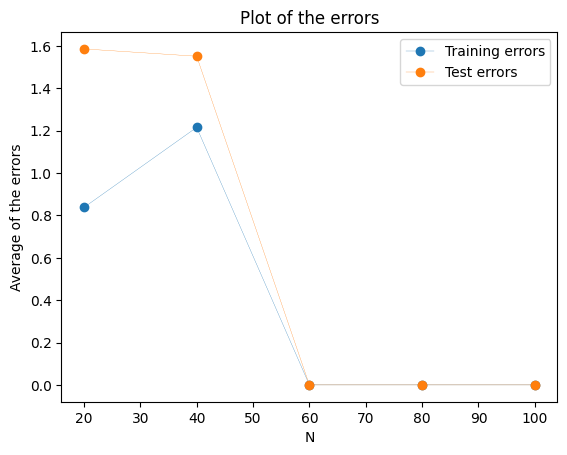

Fold  1  of  5  test indices: [0 1 2 3 4 5 6 7]
Fold  2  of  5  test indices: [ 8  9 10 11 12 13 14 15]
Fold  3  of  5  test indices: [16 17 18 19 20 21 22 23]
Fold  4  of  5  test indices: [24 25 26 27 28 29 30 31]
Fold  5  of  5  test indices: [32 33 34 35 36 37 38 39]


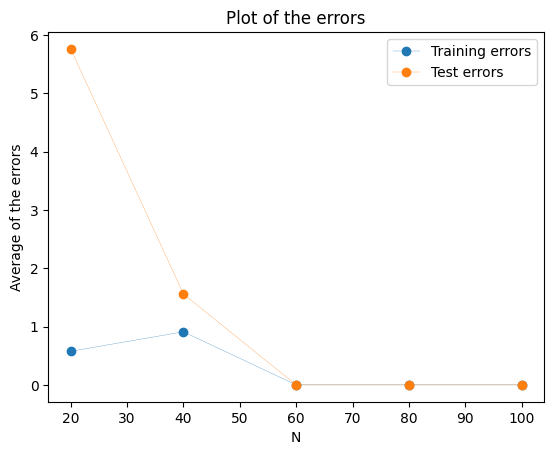

Fold  1  of  5  test indices: [0 1 2 3 4 5 6 7]
Fold  2  of  5  test indices: [ 8  9 10 11 12 13 14 15]
Fold  3  of  5  test indices: [16 17 18 19 20 21 22 23]
Fold  4  of  5  test indices: [24 25 26 27 28 29 30 31]
Fold  5  of  5  test indices: [32 33 34 35 36 37 38 39]


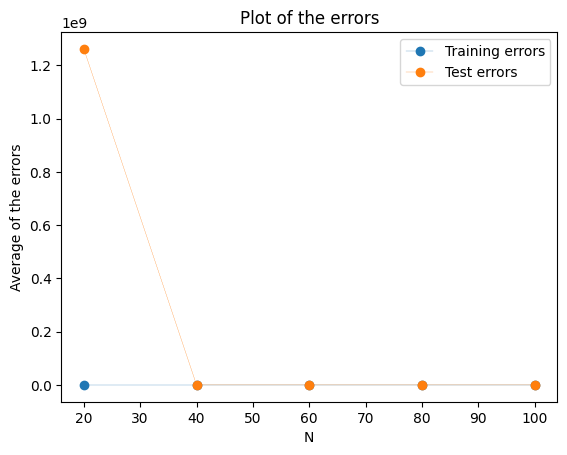

Fold  1  of  5  test indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Fold  2  of  5  test indices: [12 13 14 15 16 17 18 19 20 21 22 23]
Fold  3  of  5  test indices: [24 25 26 27 28 29 30 31 32 33 34 35]
Fold  4  of  5  test indices: [36 37 38 39 40 41 42 43 44 45 46 47]
Fold  5  of  5  test indices: [48 49 50 51 52 53 54 55 56 57 58 59]


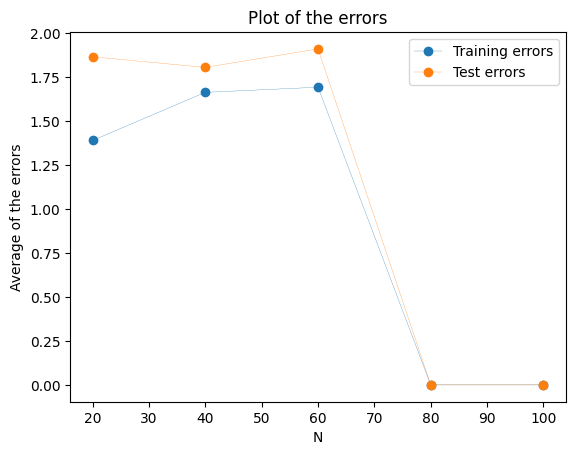

Fold  1  of  5  test indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Fold  2  of  5  test indices: [12 13 14 15 16 17 18 19 20 21 22 23]
Fold  3  of  5  test indices: [24 25 26 27 28 29 30 31 32 33 34 35]
Fold  4  of  5  test indices: [36 37 38 39 40 41 42 43 44 45 46 47]
Fold  5  of  5  test indices: [48 49 50 51 52 53 54 55 56 57 58 59]


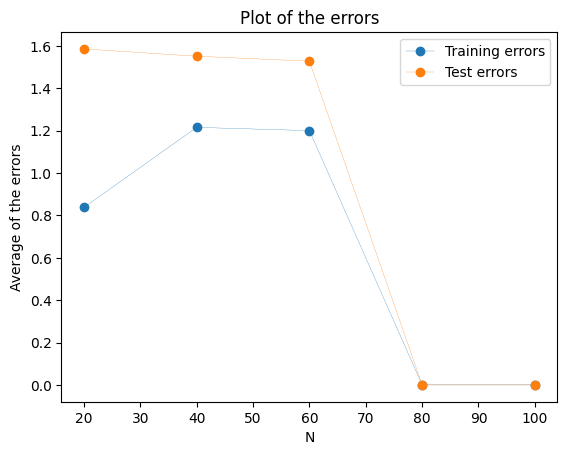

Fold  1  of  5  test indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Fold  2  of  5  test indices: [12 13 14 15 16 17 18 19 20 21 22 23]
Fold  3  of  5  test indices: [24 25 26 27 28 29 30 31 32 33 34 35]
Fold  4  of  5  test indices: [36 37 38 39 40 41 42 43 44 45 46 47]
Fold  5  of  5  test indices: [48 49 50 51 52 53 54 55 56 57 58 59]


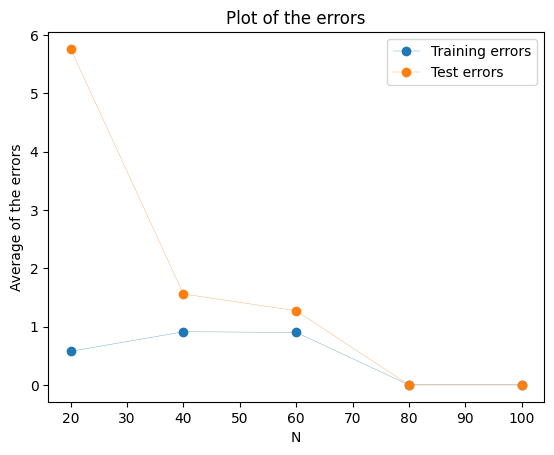

Fold  1  of  5  test indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Fold  2  of  5  test indices: [12 13 14 15 16 17 18 19 20 21 22 23]
Fold  3  of  5  test indices: [24 25 26 27 28 29 30 31 32 33 34 35]
Fold  4  of  5  test indices: [36 37 38 39 40 41 42 43 44 45 46 47]
Fold  5  of  5  test indices: [48 49 50 51 52 53 54 55 56 57 58 59]


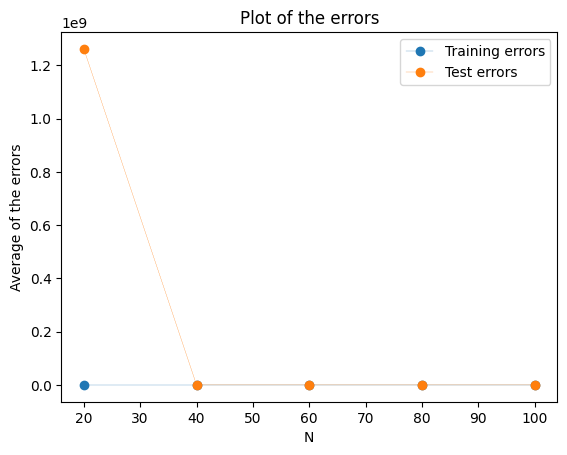

Fold  1  of  5  test indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Fold  2  of  5  test indices: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Fold  3  of  5  test indices: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Fold  4  of  5  test indices: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Fold  5  of  5  test indices: [64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]


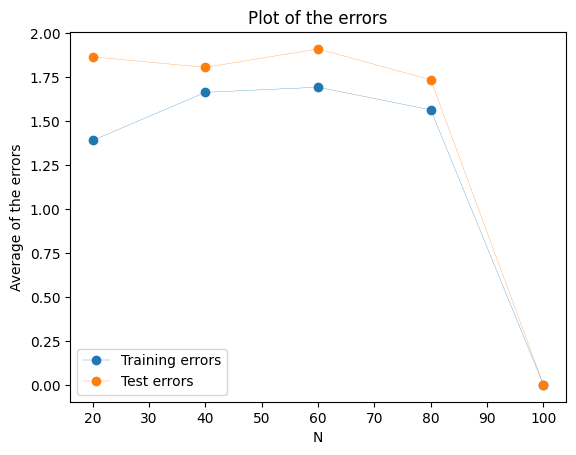

Fold  1  of  5  test indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Fold  2  of  5  test indices: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Fold  3  of  5  test indices: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Fold  4  of  5  test indices: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Fold  5  of  5  test indices: [64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]


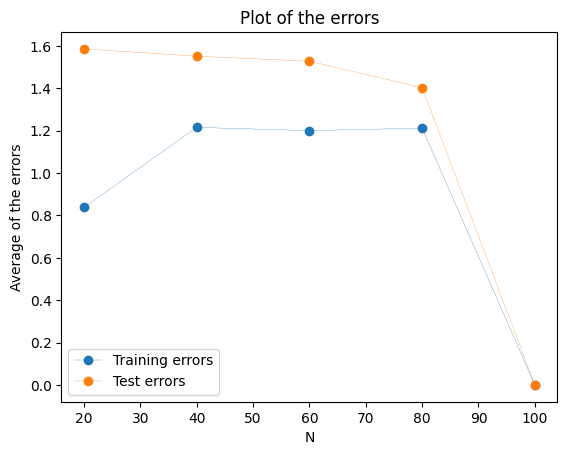

Fold  1  of  5  test indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Fold  2  of  5  test indices: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Fold  3  of  5  test indices: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Fold  4  of  5  test indices: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Fold  5  of  5  test indices: [64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]


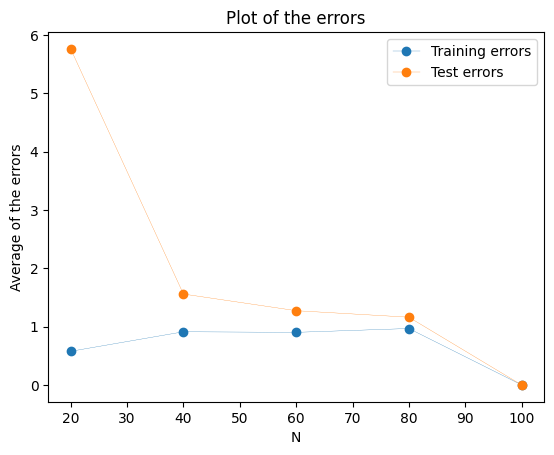

Fold  1  of  5  test indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Fold  2  of  5  test indices: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Fold  3  of  5  test indices: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Fold  4  of  5  test indices: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Fold  5  of  5  test indices: [64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]


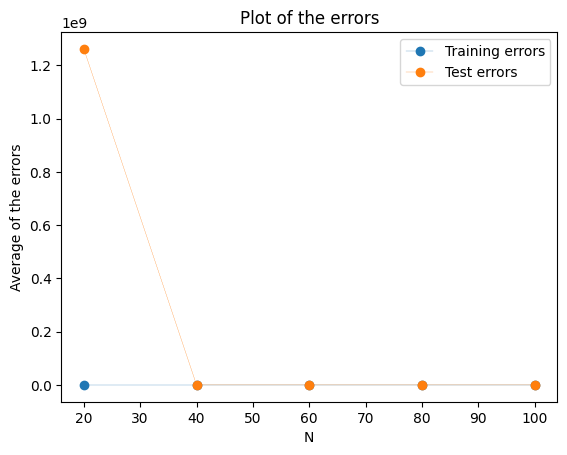

Fold  1  of  5  test indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Fold  2  of  5  test indices: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Fold  3  of  5  test indices: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
Fold  4  of  5  test indices: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Fold  5  of  5  test indices: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


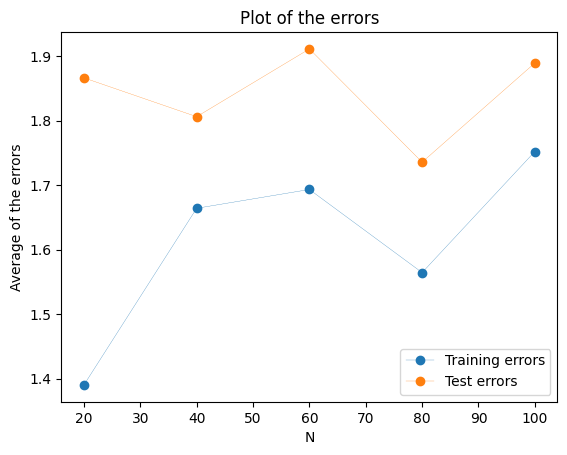

Fold  1  of  5  test indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Fold  2  of  5  test indices: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Fold  3  of  5  test indices: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
Fold  4  of  5  test indices: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Fold  5  of  5  test indices: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


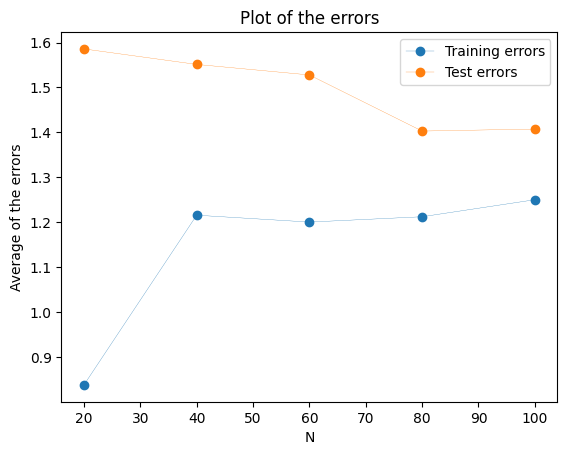

Fold  1  of  5  test indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Fold  2  of  5  test indices: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Fold  3  of  5  test indices: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
Fold  4  of  5  test indices: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Fold  5  of  5  test indices: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


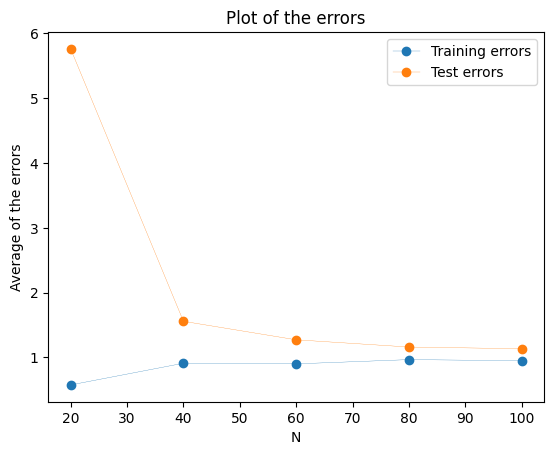

Fold  1  of  5  test indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Fold  2  of  5  test indices: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Fold  3  of  5  test indices: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
Fold  4  of  5  test indices: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Fold  5  of  5  test indices: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


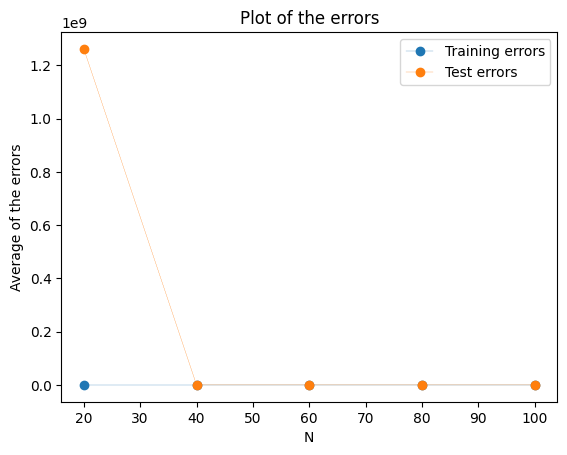

In [ ]:
# Setup:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

N = np.linspace(20, 100, 5)
num_folds = 5
kf = KFold(n_splits=num_folds)
degrees = [1, 2, 6, 12]

# Initialize arrays to store errors
fold_train_errors = np.zeros((len(N), len(degrees)))
fold_test_errors = np.zeros((len(N), len(degrees)))

# Iterate through N values:
for j, N_val in enumerate(N):
    # Iterate through polynomial degrees:
    for k, d in enumerate(degrees):
        # Initialize arrays to store errors for each fold
        fold_train_errors_temp = np.zeros(num_folds)
        fold_test_errors_temp = np.zeros(num_folds)

        # Perform 5-fold cross-validation
        for i, (train_index, test_index) in enumerate(kf.split(x[:int(N_val)])):
            # Print out test indices:
            print('Fold ', i + 1, ' of ', num_folds, ' test indices:', test_index)

            # Training and testing data points for this fold:
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Perform polynomial regression using polyfit
            coeffs = np.polyfit(x_train, y_train, d)

            # Predict on test and train data
            y_train_predict = np.polyval(coeffs, x_train)
            y_test_predict = np.polyval(coeffs, x_test)

            # Find the mean squared error
            fold_train_errors_temp[i] = mean_squared_error(y_train, y_train_predict)
            fold_test_errors_temp[i] = mean_squared_error(y_test, y_test_predict)

        # Compute average errors over the 5 folds
        fold_train_errors[j, k] = np.mean(fold_train_errors_temp)
        fold_test_errors[j, k] = np.mean(fold_test_errors_temp)

        # Let's visualize our fitted quadratic:
        plt.figure()

        plt.plot(N, fold_train_errors[:, k], marker = 'o', linewidth = 0.2)
        plt.plot(N, fold_test_errors[:, k], marker = 'o', linewidth = 0.2)

        plt.legend(['Training errors', 'Test errors'], loc = 'best')
        plt.xlabel('N')
        plt.ylabel('Average of the errors')
        plt.title('Plot of the errors')

        plt.show()



